### Contents
* Import
* Data Manipulation
* decision tree/ANN

## 1 Import

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:

#import data
df=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Data Specilization ML\1 DATA\MANIPULATED DATA\df_scaled.csv"))

In [3]:
#import pleasant weather data
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Other\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

## 2 Data Manipulation

In [4]:
#dropping unrelated station data from main dataset
activedf=df.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max','Unnamed: 0'])

In [5]:
activedf.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [7]:
#Create an 'X' and y df by dropping the unneeded columns.
X = activedf.drop(['DATE', 'MONTH'], axis=1)
y = pleasantdf.drop(['DATE'],axis=1)

In [8]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [9]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [10]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

## 3 ANN

#### ANN Scripts Below

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.07656891e+00  1.06450796e+00  1.54813801e+00 ... -6.51180255e-03
  -6.51735787e-05 -4.05345279e-03]
 [-1.71824547e-01 -5.72021496e-01 -9.80683304e-01 ... -7.28839270e-01
  -7.38790202e-01 -9.83860559e-01]
 [ 2.44306605e-01 -2.65116758e-02 -1.25162845e+00 ...  9.86688466e-01
   1.23114321e+00  6.29939380e-01]
 ...
 [ 1.07656891e+00 -2.65116758e-02  1.99971325e+00 ... -1.18029394e+00
  -5.74629085e-01 -1.64667125e+00]
 [-1.83634915e+00 -8.44776406e-01 -8.00053210e-01 ... -6.51180255e-03
  -6.51735787e-05 -4.05345279e-03]
 [-1.83634915e+00  1.20088542e+00  5.54672495e-01 ... -2.47287625e-01
   2.72950127e-02 -8.10953422e-01]]


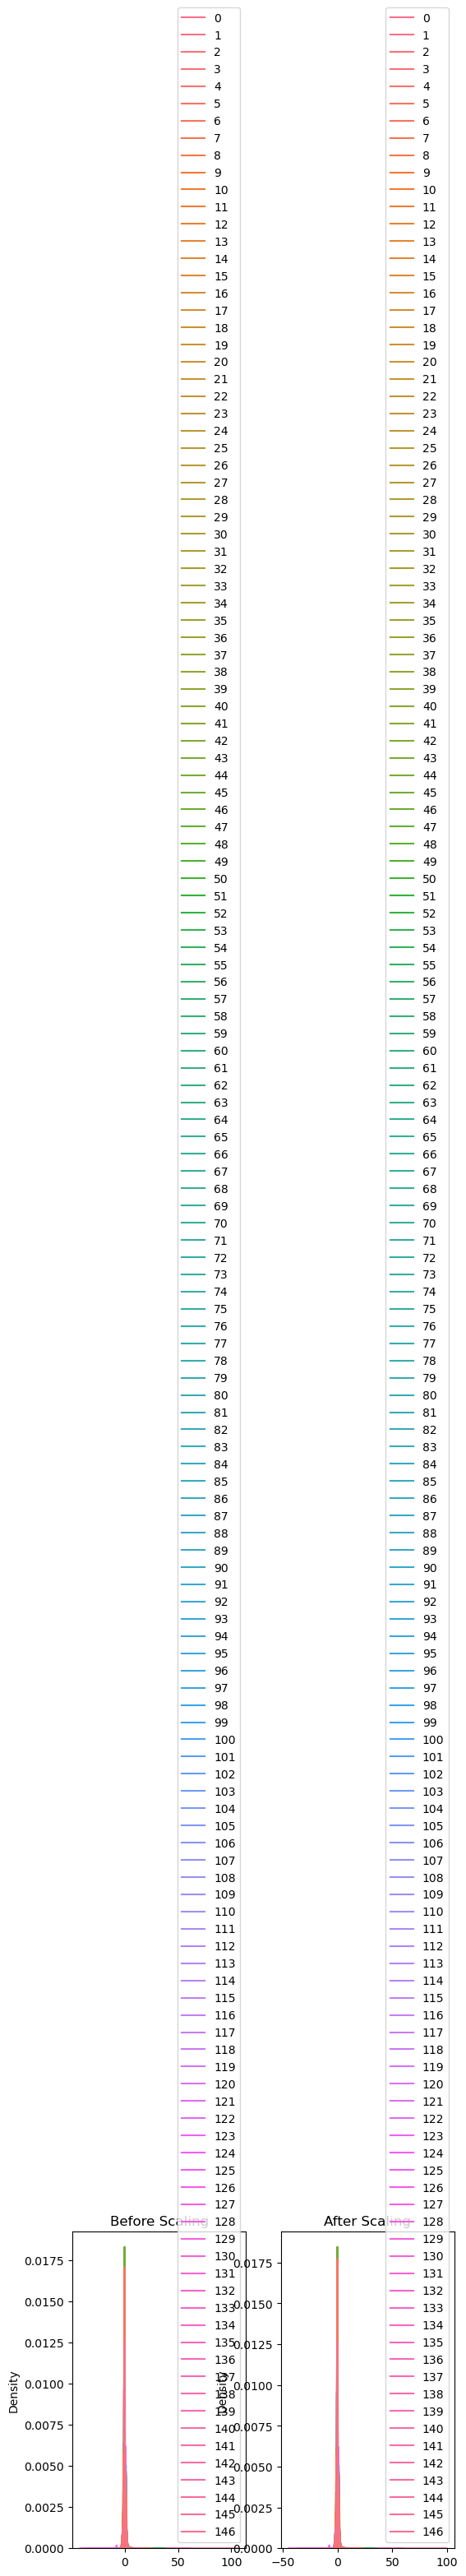

In [18]:
#Show scaling differences ##turn off legend
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

#SCENARIO 2 CODE
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

In [93]:
#SCENARIO 3 CODE
mlp = MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=0.00000000001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=1e-11)

#testing ANN accuracy #ANN MODEL 
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

##### ANN model 1 for test and train data it had an similar accuracy score of 0.49%

#testing ANN accuracy #ANN MODEL 2
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

##### ANN model 2 for y_pred_test/y_test has an accuracy score of 0.529%, the train data has an accuracy score of 0.537%

In [94]:
#testing ANN accuracy #ANN MODEL 3
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7504066930048803
0.6704426629487626


#### ANN model 3 for y_pred_test/y_test has an accuracy score of 0.670%, the train data has an accuracy of 0.750%

In [21]:
print(y_pred_test.shape)
print(y_test.shape)
print(y_pred.shape)
print(y_train.shape)

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


In [17]:
locations = list({x.split("_")[0] for x in activedf.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

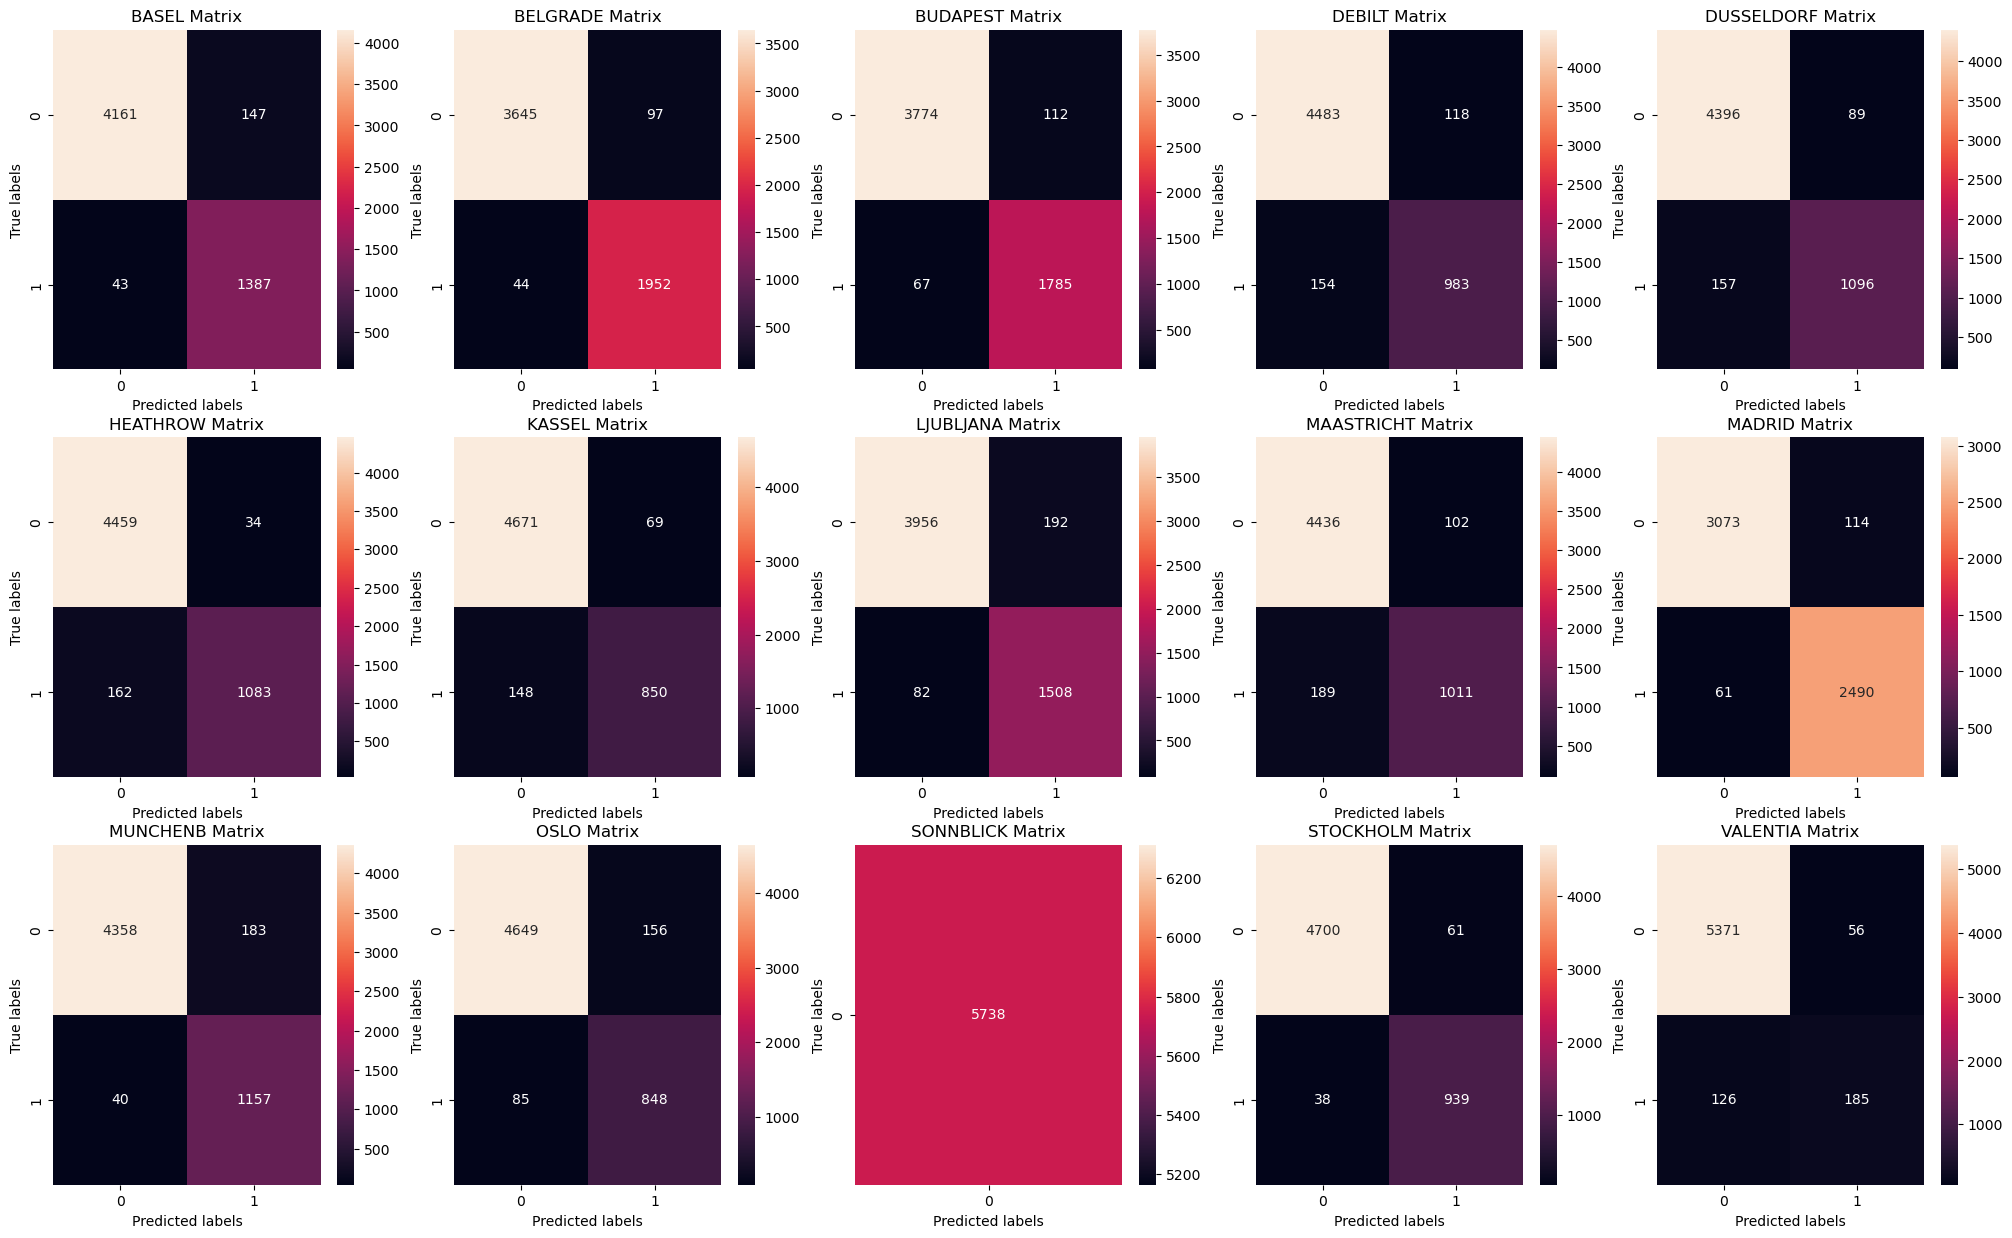

In [95]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1